In [9]:
from utils import Dataloader
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import time
from sklearn.decomposition import PCA

In [10]:
def array_to_matrix(arr, n_cols):
    n_rows = len(arr) // n_cols
    return np.array(arr).reshape(n_rows, n_cols)

In [11]:
mushroom = Dataloader(None, None, 'mushroom', None, None)
print(f"Exporting mushroom to python... ")
data = mushroom.export_to_python()

fetching mushroom dataset
Dataset:  mushroom
X_train:  [[-0.21699152  0.14012794 -0.98389939 -0.84322964  1.3573133   0.16289645
  -0.43886364  1.49468272 -1.35889624  0.87351064  1.35578135  0.68377765
  -0.89305291  0.0965768   0.63199138  0.          0.14203663 -0.25613174
  -1.27221574  1.42842641  0.28432981 -0.8771691 ]
 [ 1.02971224  0.14012794 -0.19824983 -0.84322964 -1.01956488  0.16289645
  -0.43886364  1.49468272 -1.35889624  0.87351064  1.35578135 -0.9254372
   0.58638466  0.62244139  0.63199138  0.          0.14203663 -0.25613174
  -1.27221574  1.42842641  0.28432981  1.44858865]]
y_train:  [[-1.  1.]
 [-1.  1.]]
X_test:  [[-0.8403434  -1.48615695 -0.19824983 -0.84322964  0.40656203  0.16289645
   2.27861212 -0.66903831 -0.51147238  0.87351064  0.20869036  0.68377765
  -2.37249048  0.62244139  0.63199138  0.          0.14203663 -0.25613174
  -1.27221574 -0.2504706  -0.5143892  -0.29572966]
 [-0.8403434   0.14012794 -0.98389939 -0.84322964  1.83268894  0.16289645
  -0.43886

c:\Users\ACER\Documents\AI\KDL\KDL\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col] = le.fit_transform(X[col])
c:\Users\ACER\Documents\AI\KDL\KDL\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col] = le.fit_transform(X[col])
c:\Users\ACER\Documents\AI\KDL\KDL\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [12]:
C = 10.0
clf_mushroom = SVC(kernel = 'linear', C = C)
X_shape = mushroom.X_train_shape
X_train = data[0]
y_train = data[1]
y = array_to_matrix(y_train,2)
X = array_to_matrix(X_train,X_shape[1])
y = np.array([np.argmax(np.append(i,0)) for i in y])
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
clf_mushroom.fit(X_reduced, y) 


SVC(C=10.0, kernel='linear')

In [8]:
print(X.shape)

(6499, 22)


In [13]:
X_test = array_to_matrix(data[2],X_shape[1])
y_test = array_to_matrix(data[3],2)
y_test = np.array([np.argmax(np.append(i,0)) for i in y_test])


X_test_reduced = pca.transform(X_test)
y_pred = clf_mushroom.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

[1 1 1 ... 1 1 1]
Accuracy: 0.7704615384615384
Precision: 0.7386231038506418
Recall: 0.809462915601023
F1-score: 0.7724222086638194


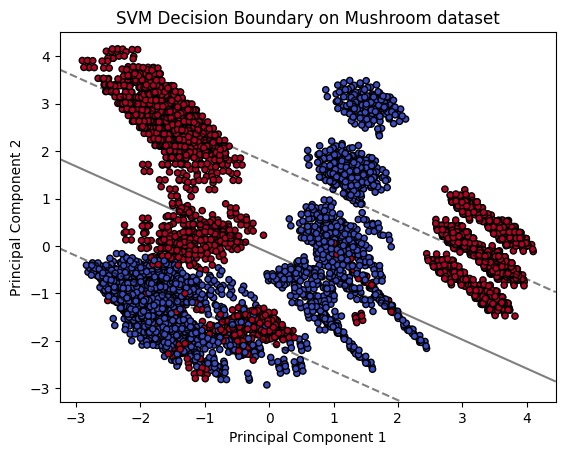

In [15]:
# 4. Vẽ biểu đồ
# Vẽ các điểm dữ liệu
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = clf_mushroom.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on Mushroom dataset")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# use all digits
perplexity_value = 30
# mnist = fetch_mldata("MNIST original")
mnist = fetch_openml("mnist_784", version=1, as_frame=False, parser="liac-arff")
print("fetched")
mytargets = list(range(0, 10))
# mytargets = [3, 8]
X_train, y_train = mnist.data / 255.0, mnist.target
y_train = y_train.astype(int)

mask = (y_train == 0) | (y_train == 1)
X_0 = np.array(X_train[mask])
y_0 = np.array(y_train[mask])

# for i, label in enumerate(y_train):
#     if label in mytargets:
#         X_train.append(X_train[i])
#         y_train.append(y_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = (
    X_train[:num_samples_to_plot],
    y_train[:num_samples_to_plot],
)  # lets subsample a bit for a first impression

X_train_array = np.array(X_train)
X_train_array = np.array(X_0)
y_train = np.array(y_0)

print(np.unique(y_train))
colors = [
    "black",  # Black
    "blue",  # Blue
    "green",  # Green
    "red",  # Red
    "purple",  # Purple
    "orange",  # Orange
    "cyan",  # Cyan
    "magenta",  # Magenta
    "yellow",  # Yellow
    "brown",  # Brown
]

for digit in mytargets:
    instances = [i for i in y_train if i == digit]
    print("Digit", digit, "appears ", len(instances), "times")
if perplexity_value >= len(X_train_array):
    raise ValueError("Perplexity must be less than the number of samples.")

transformer = TSNE(n_components=2, perplexity=perplexity_value, verbose=2)
fig, plot = plt.subplots()
fig.set_size_inches(15, 15)
plt.prism()

X_transformed = transformer.fit_transform(X_train_array)
plot.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=[colors[label] for label in y_train],
)
plot.set_xticks(())
plot.set_yticks(())

legends = []
for label in np.unique(y_train):
    color = colors[label]
    patch = Patch(color=color, label=label)
    legends.append(patch)

